In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

In [2]:
import random as rd
import math

In [3]:
np.set_printoptions(precision=2, edgeitems=1000, linewidth=1000, threshold=1000)

In [4]:
G = 1
N = 19

In [5]:
la = G + (N % 3)
lb = G + (N % 5)
na = 2 + (G % 2)
nb = 2 + (N % 2)
ra = 4 + (G % 2)
rb = 5 - (G % 2)

print(f"""λ_A = {la}
λ_B = {lb}
N_A = {na}
N_B = {nb}
R_A = {ra}
R_B = {rb}""")

λ_A = 2
λ_B = 5
N_A = 3
N_B = 3
R_A = 5
R_B = 4


In [6]:
ls = (na + nb - (G % 3)) * (G + (N % 4))
print(f"""λ_S = {ls}""")

λ_S = 20


In [7]:
_s = 0.3 

class S:
    def __init__(self, x, y, a1, a2, b1, b2, color='#0000ff33'):
        self.x = x
        self.y = y
        self.a1 = a1
        self.a2 = a2
        self.b1 = b1
        self.b2 = b2
        
        self.color=color
                 
        
    def plot_S(self):
        plt.scatter([self.x], [self.y], s=1000, color=self.color)
        plt.text(
            self.x-0.2, 
            self.y-0.2, 
            f'$S^{{{f"{self.a1}{self.a2}"}}}_{{{f"{self.b1}{self.b2}"}}}$'
        )

class ArrowA:
    def __init__(self, x, y, color='#00ff0033', text='', isPrintLS=False):
        self.x = x
        self.y = y
        
        self.color=color
        self.text = text
        self.isPrintLS = False # isPrintLS
             
        
    def plot_arrow(self):
        dx = -1
        dy = -1
        plt.arrow(self.x, self.y, dx, dy, width=0.1, color=self.color)
        plt.text((self.x+dx), (self.y+dy), f'{self.text}$λ_A$')
        
        if self.isPrintLS:
            plt.arrow(self.x+dx-1, self.y+dy, -dx, -dy, width=0.1, color=self.color)
            plt.text((self.x+dx-1+1), (self.y+dy+1), f'$λ_S$')

class ArrowB:
    def __init__(self, x, y, color='#ff000033', text='', isPrintLS=False):
        self.x = x
        self.y = y
        
        self.color=color
        self.text = text
        self.isPrintLS = False # isPrintLS
             
        
    def plot_arrow(self):
        dx = 1
        dy = -1
        plt.arrow(self.x, self.y, dx, dy, width=0.1, color=self.color)        
        plt.text((self.x+dx), (self.y+dy), f'{self.text}$λ_B$')
        
        if self.isPrintLS:
            plt.arrow(self.x+dx+1, self.y+dy, -dx, -dy, width=0.1, color=self.color)
            plt.text((self.x+dx+1-1), (self.y+dy+1), f'$λ_S$')



class Graph:
    def __init__(self, a1, a2, b1, b2):
        self.a1 = a1
        self.a2 = a2
        self.b1 = b1
        self.b2 = b2
        
        self.SS, self.ArrowAS, self.ArrowBS = self.gen_S(self.a1, self.a2, self.b1, self.b2)
        
        self.A = np.zeros((len(self.SS), len(self.SS)))
  
    @staticmethod 
    def gen_S(a1, a2, b1, b2):
        SS = []
        ArrowAS = []
        ArrowBS = []
        
        def isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2):
            isPrintLS_A = False
            isPrintLS_B = False
            isPrintLS_A = np.random.choice([True, False])
            if isPrintLS_A:
                isPrintLS_B = False
            else:
                isPrintLS_B = True
            if x1 == 0+1:
                isPrintLS_A = True
            if y1 == nb and y2==0:
                isPrintLS_B = True
            if y1+y2 == rb:
                isPrintLS_A = True
            if x1+x2 == ra:
                isPrintLS_B = True
                
            

            if x1 > 0 and y1+y2 > b1-1:
                ArrowAS.append(ArrowA(x, y, text=x1, isPrintLS=isPrintLS_A))
            if x1 > 0 and y1+y2 > b1-1:
                ArrowBS.append(ArrowB(x, y, text=y1, isPrintLS=isPrintLS_B))
                
        for i in range(b1):
            y1 = b1
            y2 = b2 - i
            if y2>=0:
                for j in range(a1+a2+1):
                    x = 2*i - 2*j
                    y = -2*j - 2*i
                    
                    x1 = a1
                    x2 = a2 - j

                    if x2>=0:
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
                        
                    else:
                        x1 = a2+a1-j
                        x2 = 0
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
            else:
                y1 = b2+b1-i
                y2 = 0
                for j in range(a1+a2+1):
                    x = 2*i - 2*j
                    y = -2*j - 2 *i
                    
                    x1 = a1
                    x2 = a2 - j

                    if x2>=0:
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
                    else:
                        x1 = a2+a1-j
                        x2 = 0
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)

        return SS[:-1], ArrowAS, ArrowBS
    
    @staticmethod 
    def gen_matrix_A(d, a1, a2, b1, b2):
        SS = []
        ArrowAS = []
        ArrowBS = []
        
        A = np.zeros((len(d), len(d)))
        
        def isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2):
            isPrintLS_A = False
            isPrintLS_B = False
            isPrintLS_A = np.random.choice([True, False])
            if isPrintLS_A:
                isPrintLS_B = False
            else:
                isPrintLS_B = True
            if x1 == 0+1:
                isPrintLS_A = True
            if y1 == nb and y2==0:
                isPrintLS_B = True
            if y1+y2 == rb:
                isPrintLS_A = True
            if x1+x2 == ra:
                isPrintLS_B = True
            
            if x1 > 0 and y1+y2 > b1-1:
                ArrowAS.append(ArrowA(x, y, text=x1, isPrintLS=isPrintLS_A))
                if x2 != 0:
                    A[d.index((x1, x2, y1, y2))][d.index((x1, x2-1, y1, y2))] = la*x1
                    if isPrintLS_A:
                        A[d.index((x1, x2-1, y1, y2))][d.index((x1, x2, y1, y2))] = ls
                else:
                    A[d.index((x1, x2, y1, y2))][d.index((x1-1, 0, y1, y2))] = la*x1
                    if isPrintLS_A:
                        A[d.index((x1-1, 0, y1, y2))][d.index((x1, x2, y1, y2))] = ls
                        
            if x1 > 0 and y1+y2 > b1-1:
                ArrowBS.append(ArrowB(x, y, text=y1, isPrintLS=isPrintLS_B))
#                 A[d.index((x1, x2, y1, y2))] = 1
                if y2 != 0:
                    A[d.index((x1, x2, y1, y2))][d.index((x1, x2, y1, y2-1))] = lb*y1
                    if isPrintLS_B:
                        A[d.index((x1, x2, y1, y2-1))][d.index((x1, x2, y1, y2))] = ls
                else:
                    A[d.index((x1, x2, y1, y2))][d.index((x1, x2, y1-1, 0))] = lb*y1
                    if isPrintLS_B:
                        A[d.index((x1, x2, y1-1, 0))][d.index((x1, x2, y1, y2))] = ls
                
        for i in range(b1):
            y1 = b1
            y2 = b2 - i
            if y2>=0:
                for j in range(a1+a2+1):
                    x = 2*i - 2*j
                    y = -2*j - 2*i
                    
                    x1 = a1
                    x2 = a2 - j

                    if x2>=0:
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
                        
                    else:
                        x1 = a2+a1-j
                        x2 = 0
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
            else:
                y1 = b2+b1-i
                y2 = 0
                for j in range(a1+a2+1):
                    x = 2*i - 2*j
                    y = -2*j - 2 *i
                    
                    x1 = a1
                    x2 = a2 - j

                    if x2>=0:
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
                    else:
                        x1 = a2+a1-j
                        x2 = 0
                        SS.append(S(x, y, x1, x2, y1, y2))
                        isArrow(x, y, x1, x2, y1, y2, a1, a2, b1, b2)
        A = A - np.diag(A.sum(axis=1))
                        
        return A
    
    

    def plot_graph(self):
        plt.figure(figsize=(10,10))
        plt.xlim(-12,12)
        plt.ylim(-23,1)
        
        for s in self.SS:
            s.plot_S()
            
        for s in self.ArrowAS:
            s.plot_arrow()
            
        for s in self.ArrowBS:
            s.plot_arrow()
         
        # plt.grid()

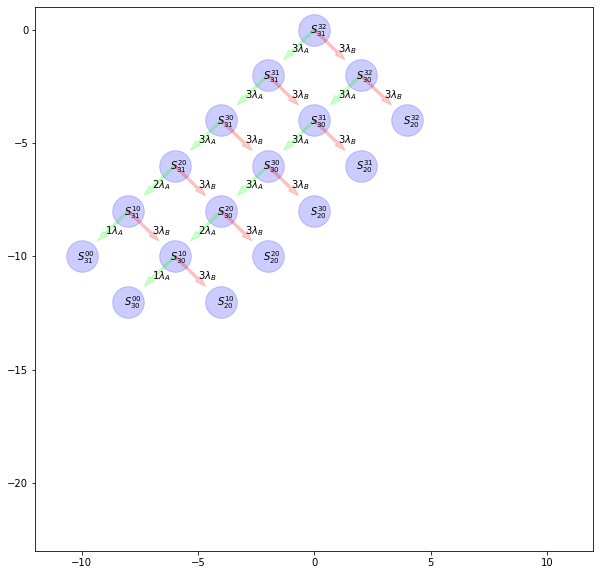

In [8]:
a1 = na
a2 = ra - na

b1 = nb
b2 = rb - nb

g = Graph(a1, a2, b1, b2)
g.plot_graph()

In [9]:
A = np.array([[-48.,  27.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [ 32., -48.,   0.,  27.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [ 32.,   0., -48.,   0.,  27.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,  32.,   0., -48.,   0.,  27.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,  32.,   0.,   0., -48.,   0.,  27.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,  32.,   0.,   0., -48.,   0.,  27.,  21.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,  32.,   0.,   0., -41.,   0.,  27.,  14.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0., -41.,   0.,  27.,  14.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0., -34.,   0.,  27.,   7.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0., -34.,   0.,  27.,   7.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.]])

A = A - np.diag(np.diag(A))
A = A - np.diag(A.sum(axis=1))
display(sp.Matrix(A))

Matrix([
[-48.0,  27.0,  21.0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
[ 32.0, -80.0,     0,  27.0,  21.0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
[ 32.0,     0, -80.0,     0,  27.0,  21.0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
[    0,  32.0,     0, -32.0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
[    0,     0,  32.0,     0, -80.0,     0,  27.0,  21.0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
[    0,     0,  32.0,     0,     0, -80.0,     0,  27.0,  21.0,     0,     0,     0,     0,     0,     0,     0,     0],
[    0,     0,     0,     0,  32.0,     0, -32.0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
[    0,     0,     0,     0,  32.0,     0,     0, -80.0,     0,  27.0,  21.0,     0,     0,     0,     0,     0,     0],
[    0,     0,     0,  

In [10]:
t = sp.symbols('t')
p = [sp.symbols(f'p_{i}', cls=sp.Function) for i in range(len(A))]

In [11]:
nonterminal = []
eqs = []

AT = A.T
index = 0

for i in range(len(A)):
    eq1 = 0
    eq2 = 0


    eq1 += A[i][i]*p[i]
            

    _index = np.where(AT[i] > 0)[0]
    for index in _index:
        eq2 += AT[i][index]*p[index]
    if eq1 != 0:
        nonterminal.append(i)

        
    eqs.append(sp.Eq(eq1 + eq2, 0))
    
for i in eqs:
    display(i)

TypeError: unsupported operand type(s) for *: 'float' and 'UndefinedFunction'

In [ ]:
t = sp.symbols('t')
p = [sp.symbols(f'p_{i}') for i in range(len(A))]

In [ ]:
nonterminal = []
eqs = []

AT = A.T
index = 0

for i in range(len(A)):
    eq1 = 0
    eq2 = 0


    eq1 += A[i][i]*p[i](t) 
            

    _index = np.where(AT[i] > 0)[0]
    for index in _index:
        eq2 += AT[i][index]*p[index](t)
    if eq1 != 0:
        nonterminal.append(i)

        
    eqs.append(sp.Eq(eq1 + eq2, 0))
    
for i in eqs:
    display(i)

In [ ]:
X = np.r_[A.T, [[1]*len(A)]]
b = np.array([0]*len(A)+[1])

pi = np.linalg.lstsq(X,b, rcond=None)[0];
print('Предельные вероятности:', pi);

In [ ]:
nonterminal = []
eqs = []

AT = A.T
index = 0

for i in range(len(A)):
    eq1 = 0
    eq2 = 0


    eq1 += A[i][i]*p[i](t) 
            

    _index = np.where(AT[i] > 0)[0]
    for index in _index:
        eq2 += AT[i][index]*p[index](t)
    if eq1 != 0:
        nonterminal.append(i)

        
    eqs.append(sp.Eq(p[i](t).diff(t), eq1 + eq2))
    
for i in eqs:
    display(i)

In [ ]:
ics = {p[i](0): 0 for i in range(len(A))}
ics[p[0](0)] = 1

for i in ics.keys():
    display(sp.Eq(i, ics[i]))

In [ ]:
solutions = sp.dsolve(eqs, [i(t) for i in p], ics=ics)
for i in solutions:
    display(i)

In [ ]:
Q_T = A.T
Q = A

def backward_euler(u0, tau, T):
    from scipy import optimize
    N_t = int(round(T/tau))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)

    def Phi(z, t, v):
        return z - tau*(Q_T @ z) - v
    
    for n in range(N_t):
        u[n+1] = optimize.fsolve(Phi, u[n], args=(t[n], u[n]))

    return u, t

In [ ]:
u0 = np.zeros(len(Q_T))
u0[0] = 1
u, t = backward_euler(u0, 1e-3, 1)

plt.figure(figsize=(18,8))

for i in range(len(Q_T)):
    plt.plot(t, u[:,i])
    
plt.legend(range(len(Q_T)))
# plt.semilogy()
plt.grid()
plt.show()

In [ ]:
import scipy as sc

In [ ]:
nonterminal = [0, 1, 2, 4, 5, 7, 8, 10, 11, 13]
isprav = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
otkaz = [3, 6, 9, 12, 14, 15, 16]

In [ ]:
term = [(sum(u[j, i] for i in otkaz)) for j in range(len(u))]


plt.figure(figsize=(18,8))

plt.plot(t, term)
plt.grid()
plt.show()

In [ ]:
term_ = sc.integrate.trapezoid(term, x=t)
print('Вероятности отказа системы:', term_);

In [ ]:
ready_A = [(
    5*sum(u[j, i] for i in [0, 1]) 
    + 4*sum(u[j, i] for i in [2, 4]) 
    + 3*sum(u[j, i] for i in [5, 7]) 
    + 2*sum(u[j, i] for i in [8, 10]) 
    + 1*sum(u[j, i] for i in [11, 13])) for j in range(len(u))]

plt.figure(figsize=(18,8))

plt.plot(t, ready_A)
plt.grid()
plt.show()

In [ ]:
pA = sc.integrate.trapezoid(ready_A, x=t)
print('Матожидание числа работоспособных устройств типа А:', pA);

In [ ]:
ready_B = [(
    4*sum(u[j, i] for i in [0, 2, 5, 8, 11]) 
    + 3*sum(u[j, i] for i in [1, 4, 7, 10, 13])) for j in range(len(u))]


plt.figure(figsize=(18,8))

plt.plot(t, ready_B)
plt.grid()
plt.show()

In [ ]:
pB = sc.integrate.trapezoid(ready_B, x=t)
print('Матожидание числа работоспособных устройств типа B:', pB);

In [ ]:
repair = [(
    1*sum(u[j, i] for i in range(1, len(A)))) for j in range(len(u))]


plt.figure(figsize=(18,8))

plt.plot(t, repair)
plt.grid()
plt.show()

In [ ]:
r = sc.integrate.trapezoid(repair, x=t)
print('Коэффициент загруженности ремонтной службы:', r);

In [ ]:
# Имитационное моделирование в терминах непрерывных марковских цепей
rd.seed(0)
times = []
working = []
map = [[5, 4], [5, 3], [4, 4], [5, 2], [4, 3], [3, 4], [4, 2], [3, 3], [2, 4], [3, 2], [2, 3], [1, 4], [2, 2], [1, 3], [0, 4], [1, 2], [0, 3]]
for i in range(100):
    cur_time = 0
    cur_state = 0
    work_A = 0
    work_B = 0
    while cur_time < 1.0:
        dt = 1./Q[cur_state, cur_state] * math.log(rd.random())
        cur_time += dt
        work_A += dt*map[cur_state][0]
        work_B += dt*map[cur_state][1]
        r = rd.randrange(0, -Q[cur_state, cur_state])
        for j in range(len(Q)):
            r -= Q[cur_state, j] if cur_state != j else 0
            if r < 0:
                cur_state = j
                break
    times.append(cur_time)
    working.append([work_A, work_B])

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(working)
plt.legend(['A', 'B'])
plt.grid()
plt.show()

In [ ]:
np.array(working)[:, 0]

In [ ]:
plt.plot(times)

In [ ]:
print('Среднее число готовых к эксплуатации устройств типа A и B: ', (np.array(working).mean(axis=0)/0.6).T)

In [12]:
print('Среднее t выхода на установившийся режим работы:', np.mean(np.array(times).T[0]) )

NameError: name 'times' is not defined

In [13]:
import scipy.stats as sts

class Unit:
        def __init__(self, typeUnit='A', lambda_breakdown=5, lambda_repair=5):
                self.typeUnit = typeUnit
                self.lambda_breakdown = lambda_breakdown
                self.lambda_repair = lambda_repair


        def time_breakdown(self):
                return -1. / self.lambda_breakdown * np.log(sts.uniform.rvs(loc=0, scale=1, size=1))


        def time_repair(self):
                return -1. / self.lambda_repair * np.log(sts.uniform.rvs(loc=0, scale=1, size=1))

np.random.seed(0)
times = []
working = []
for i in range(100):
    events = []
    units_A_working = [Unit('A', 7, 32), Unit('A', 7, 32)]
    units_A_stock = [Unit('A', 7, 32), Unit('A', 7, 32)]
    units_A_broken = []
    units_B_working = [Unit('B', 9, 32), Unit('B', 9, 32), Unit('B', 9, 32)]
    units_B_stock = [Unit('B', 9, 32), Unit('B', 9, 32)]
    units_B_broken = []
    cur_time = 0
    repairing = 0
    work_A = 0
    work_B = 0
    events.append(["Broken", units_A_working[0], units_A_working[0].time_breakdown()])
    events.append(["Broken", units_A_working[1], units_A_working[1].time_breakdown()])
    events.append(["Broken", units_B_working[0], units_B_working[0].time_breakdown()])
    events.append(["Broken", units_B_working[1], units_B_working[1].time_breakdown()])
    events.append(["Broken", units_B_working[2], units_B_working[2].time_breakdown()])
    while cur_time < 1.0:
        if len(events) == 0:
            break
        event = events[0]
        for e in events:
            if e[2] < event[2]:
                event = e
        events.remove(event)
        if cur_time > 0.4:
            dt = event[2] - cur_time
            work_A += dt*(len(units_A_working) + len(units_A_stock))
            work_B += dt*(len(units_B_working) + len(units_B_stock))
        cur_time = event[2]
        if event[0] == "Broken":
            if event[1].typeUnit == 'A':
                units_A_working.remove(event[1])
                units_A_broken.append(event[1])
                if len(units_A_broken) > 3:
                    repairing_event = []
                    for e in events:
                        if e[0] == "Repaired":
                            repairing_event = e
                            break
                    for e in events:
                        if e[0] != "Repaired":
                            e[2] += repairing_event[2] - cur_time
                            #
                if len(units_A_working) < 2 and len(units_A_stock) > 0:
                    unit_stock_to_working = units_A_stock.pop(0)
                    units_A_working.append(unit_stock_to_working)
                    events.append(["Broken", unit_stock_to_working, cur_time + unit_stock_to_working.time_breakdown()])
                if repairing == 0:
                    repairing = 1
                    events.append(["Repaired", event[1], cur_time + event[1].time_repair()])
            else:
                units_B_working.remove(event[1])
                units_B_broken.append(event[1])
                if len(units_B_broken) > 2:
                    repairing_event = []
                    for e in events:
                        if e[0] == "Repaired":
                            repairing_event = e
                            break
                    for e in events:
                        if e[0] != "Repaired":
                            e[2] += repairing_event[2] - cur_time
                    #
                if len(units_B_working) < 3 and len(units_B_stock) > 0:
                    unit_stock_to_working = units_B_stock.pop(0)
                    units_B_working.append(unit_stock_to_working)
                    events.append(["Broken", unit_stock_to_working, cur_time + unit_stock_to_working.time_breakdown()])
                    if repairing == 0:
                        repairing = 1
                        events.append(["Repaired", event[1], cur_time + event[1].time_repair()])
        elif event[0] == "Repaired":
            if event[1].typeUnit == 'A':
                units_A_broken.remove(event[1])
                units_A_stock.append(event[1])
                if len(units_A_working) < 2:
                    unit_stock_to_working = units_A_stock.pop(0)
                    units_A_working.append(unit_stock_to_working)
                    events.append(["Broken", unit_stock_to_working, cur_time + unit_stock_to_working.time_breakdown()])
            else:
                units_B_broken.remove(event[1])
                units_B_stock.append(event[1])
            if len(units_A_broken) > len(units_B_broken):
                repairing = 1
                events.append(["Repaired", units_A_broken[0], cur_time + units_A_broken[0].time_repair()])
            elif len(units_B_broken) != 0:
                repairing = 1
                events.append(["Repaired", units_B_broken[0], cur_time + units_B_broken[0].time_repair()])
            else:
                repairing = 0
    times.append(cur_time)
    working.append([work_A, work_B])

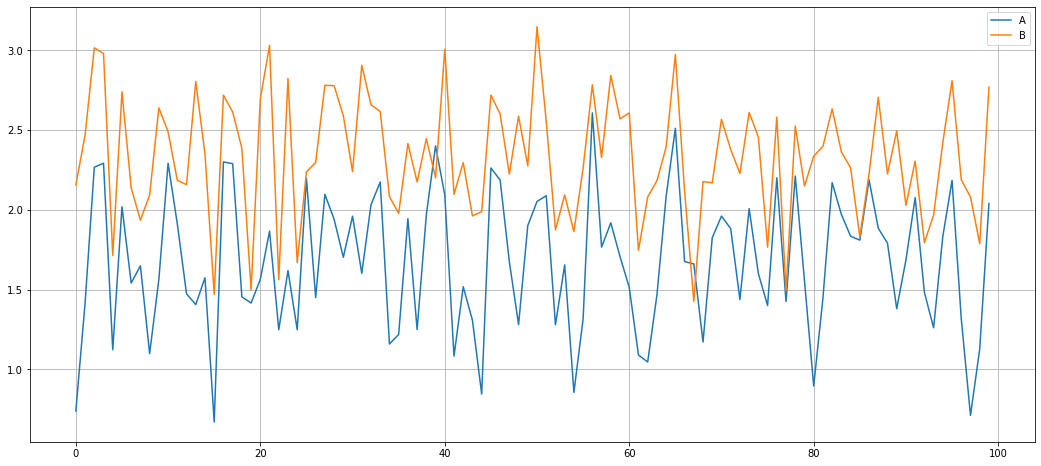

In [14]:
plt.figure(figsize=(18,8))
plt.plot(np.array(working).T[0].T)
plt.legend(['A', 'B'])
plt.grid()
plt.show()

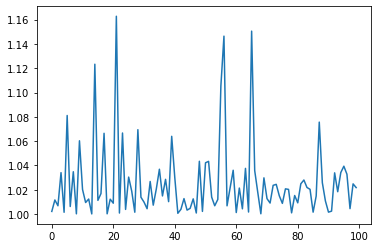

In [15]:
plt.plot(times)

In [16]:
print('Среднее число готовых к эксплуатации устройств типа A и B: ', (np.array(working).mean(axis=0)/0.6).T)

Среднее число готовых к эксплуатации устройств типа A и B:  [[2.79 3.88]]


In [17]:
print('Среднее t выхода на установившийся режим работы:', np.mean(np.array(times).T[0]) )

Среднее t выхода на установившийся режим работы: 1.0256061449143716


In [18]:
np.array(working).T[0]

array([[0.74, 1.42, 2.27, 2.29, 1.12, 2.02, 1.54, 1.65, 1.1 , 1.56, 2.29, 1.91, 1.47, 1.41, 1.57, 0.67, 2.3 , 2.29, 1.45, 1.42, 1.56, 1.87, 1.25, 1.62, 1.25, 2.2 , 1.45, 2.1 , 1.94, 1.7 , 1.96, 1.6 , 2.03, 2.17, 1.16, 1.22, 1.94, 1.25, 1.97, 2.4 , 2.09, 1.08, 1.52, 1.31, 0.85, 2.26, 2.19, 1.68, 1.28, 1.9 , 2.05, 2.09, 1.28, 1.66, 0.86, 1.32, 2.61, 1.77, 1.92, 1.71, 1.51, 1.09, 1.05, 1.47, 2.09, 2.51, 1.68, 1.66, 1.17, 1.83, 1.96, 1.88, 1.44, 2.01, 1.6 , 1.4 , 2.2 , 1.43, 2.21, 1.56, 0.9 , 1.45, 2.17, 1.97, 1.84, 1.81, 2.19, 1.89, 1.79, 1.38, 1.69, 2.08, 1.48, 1.26, 1.83, 2.19, 1.32, 0.71, 1.13, 2.04],
       [2.16, 2.47, 3.02, 2.98, 1.71, 2.74, 2.14, 1.94, 2.09, 2.64, 2.49, 2.19, 2.16, 2.81, 2.35, 1.47, 2.72, 2.61, 2.39, 1.5 , 2.7 , 3.03, 1.56, 2.82, 1.67, 2.24, 2.3 , 2.78, 2.78, 2.59, 2.24, 2.91, 2.66, 2.62, 2.08, 1.98, 2.42, 2.18, 2.45, 2.2 , 3.01, 2.1 , 2.3 , 1.96, 1.99, 2.72, 2.6 , 2.22, 2.59, 2.28, 3.15, 2.55, 1.87, 2.09, 1.86, 2.26, 2.78, 2.33, 2.84, 2.57, 2.61, 1.75, 2.08, 2.18,